In [11]:
import xarray as xr

# Replace with the actual path to your merge dataset file
merge_file_path = 'merge_2014.nc'

try:
    ds_merge = xr.open_dataset(merge_file_path)
    # Print the dataset attributes (metadata)
    print(ds_merge.attrs)
except FileNotFoundError:
    print('File not found. Please provide the correct path to the merge dataset file.')


{'CDI': 'Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/cdi)', 'Conventions': 'CF-1.6', 'history': 'Tue Feb 18 21:12:48 2020: cdo mergetime 3B-DAY.MS.MRG.3IMERG.20140601-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140602-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140603-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140604-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140605-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140606-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140607-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140608-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140609-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140610-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140612-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140614-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140615-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140616-S000000-E235959.V06.nc4.nc4 3B-DAY.MS.MRG.3IMERG.20140617-S00000

In [12]:
import xarray as xr

# Load the IMD gridded rainfall dataset
ds = xr.open_dataset('RF25_ind2020_rfp25.nc')
print(ds)


<xarray.Dataset> Size: 51MB
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 366)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 1kB 66.5 66.75 67.0 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 1kB 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 51MB ...
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6


In [13]:
# Adjust variable and coordinate names if needed based on print(ds) output
rain = ds['RAINFALL']  # or use the actual variable name if different

# Select the dates
rain_sel = rain.sel(TIME=slice('2020-10-10', '2020-10-15'))
print(rain_sel)


<xarray.DataArray 'RAINFALL' (TIME: 6, LATITUDE: 129, LONGITUDE: 135)> Size: 836kB
[104490 values with dtype=float64]
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 1kB 66.5 66.75 67.0 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 1kB 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 48B 2020-10-10 2020-10-11 ... 2020-10-15
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind2020_rfp25.grd


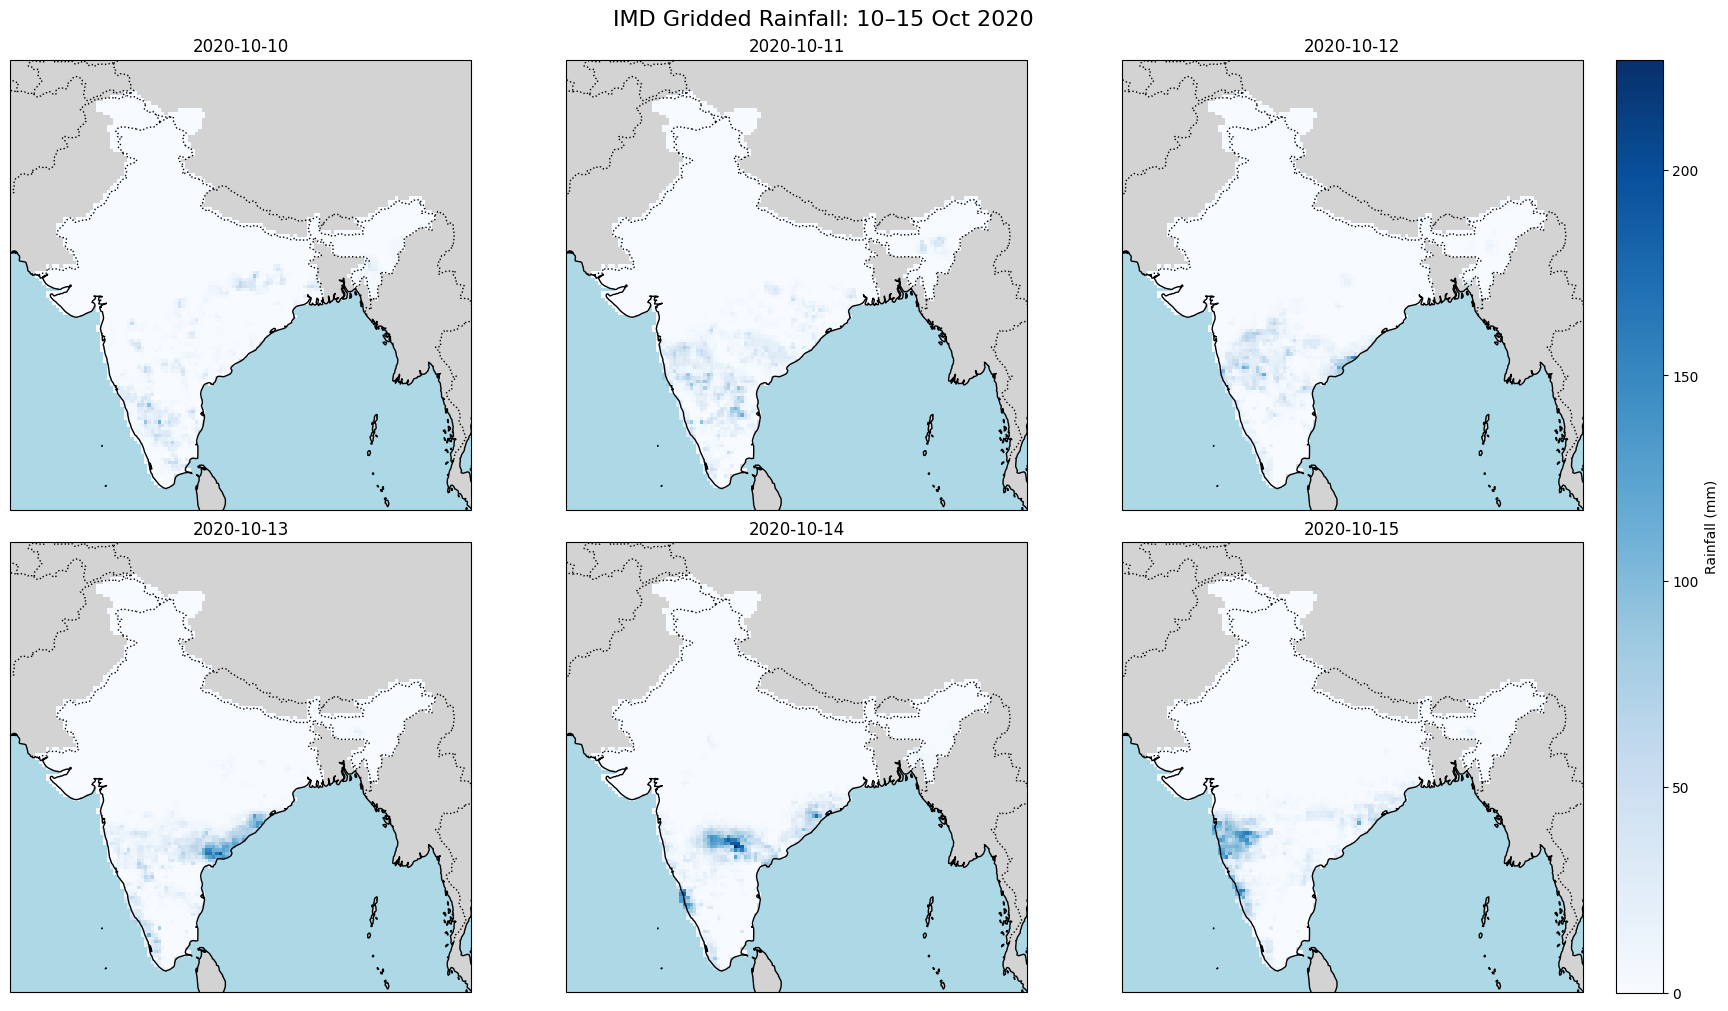

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Assuming rain_sel, ds['LONGITUDE'], ds['LATITUDE'] are already defined

fig, axes = plt.subplots(2, 3, figsize=(18, 10), subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)
axes = axes.flatten()

vmax = rain_sel.max().item()

for i, date in enumerate(rain_sel.TIME.values):
    ax = axes[i]
    data = rain_sel.sel(TIME=date)
    mesh = ax.pcolormesh(
        ds['LONGITUDE'], ds['LATITUDE'], data,
        cmap='Blues', shading='auto', vmin=0, vmax=vmax
    )
    ax.set_title(str(np.datetime_as_string(date, unit='D')))
    ax.set_extent([66, 100, 6.5, 38.5])
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Add a single colorbar for all subplots, outside the grid
fig.colorbar(mesh, ax=axes, orientation='vertical', fraction=0.03, pad=0.02, label='Rainfall (mm)')

plt.suptitle('IMD Gridded Rainfall: 10–15 Oct 2020', fontsize=16)
plt.show()


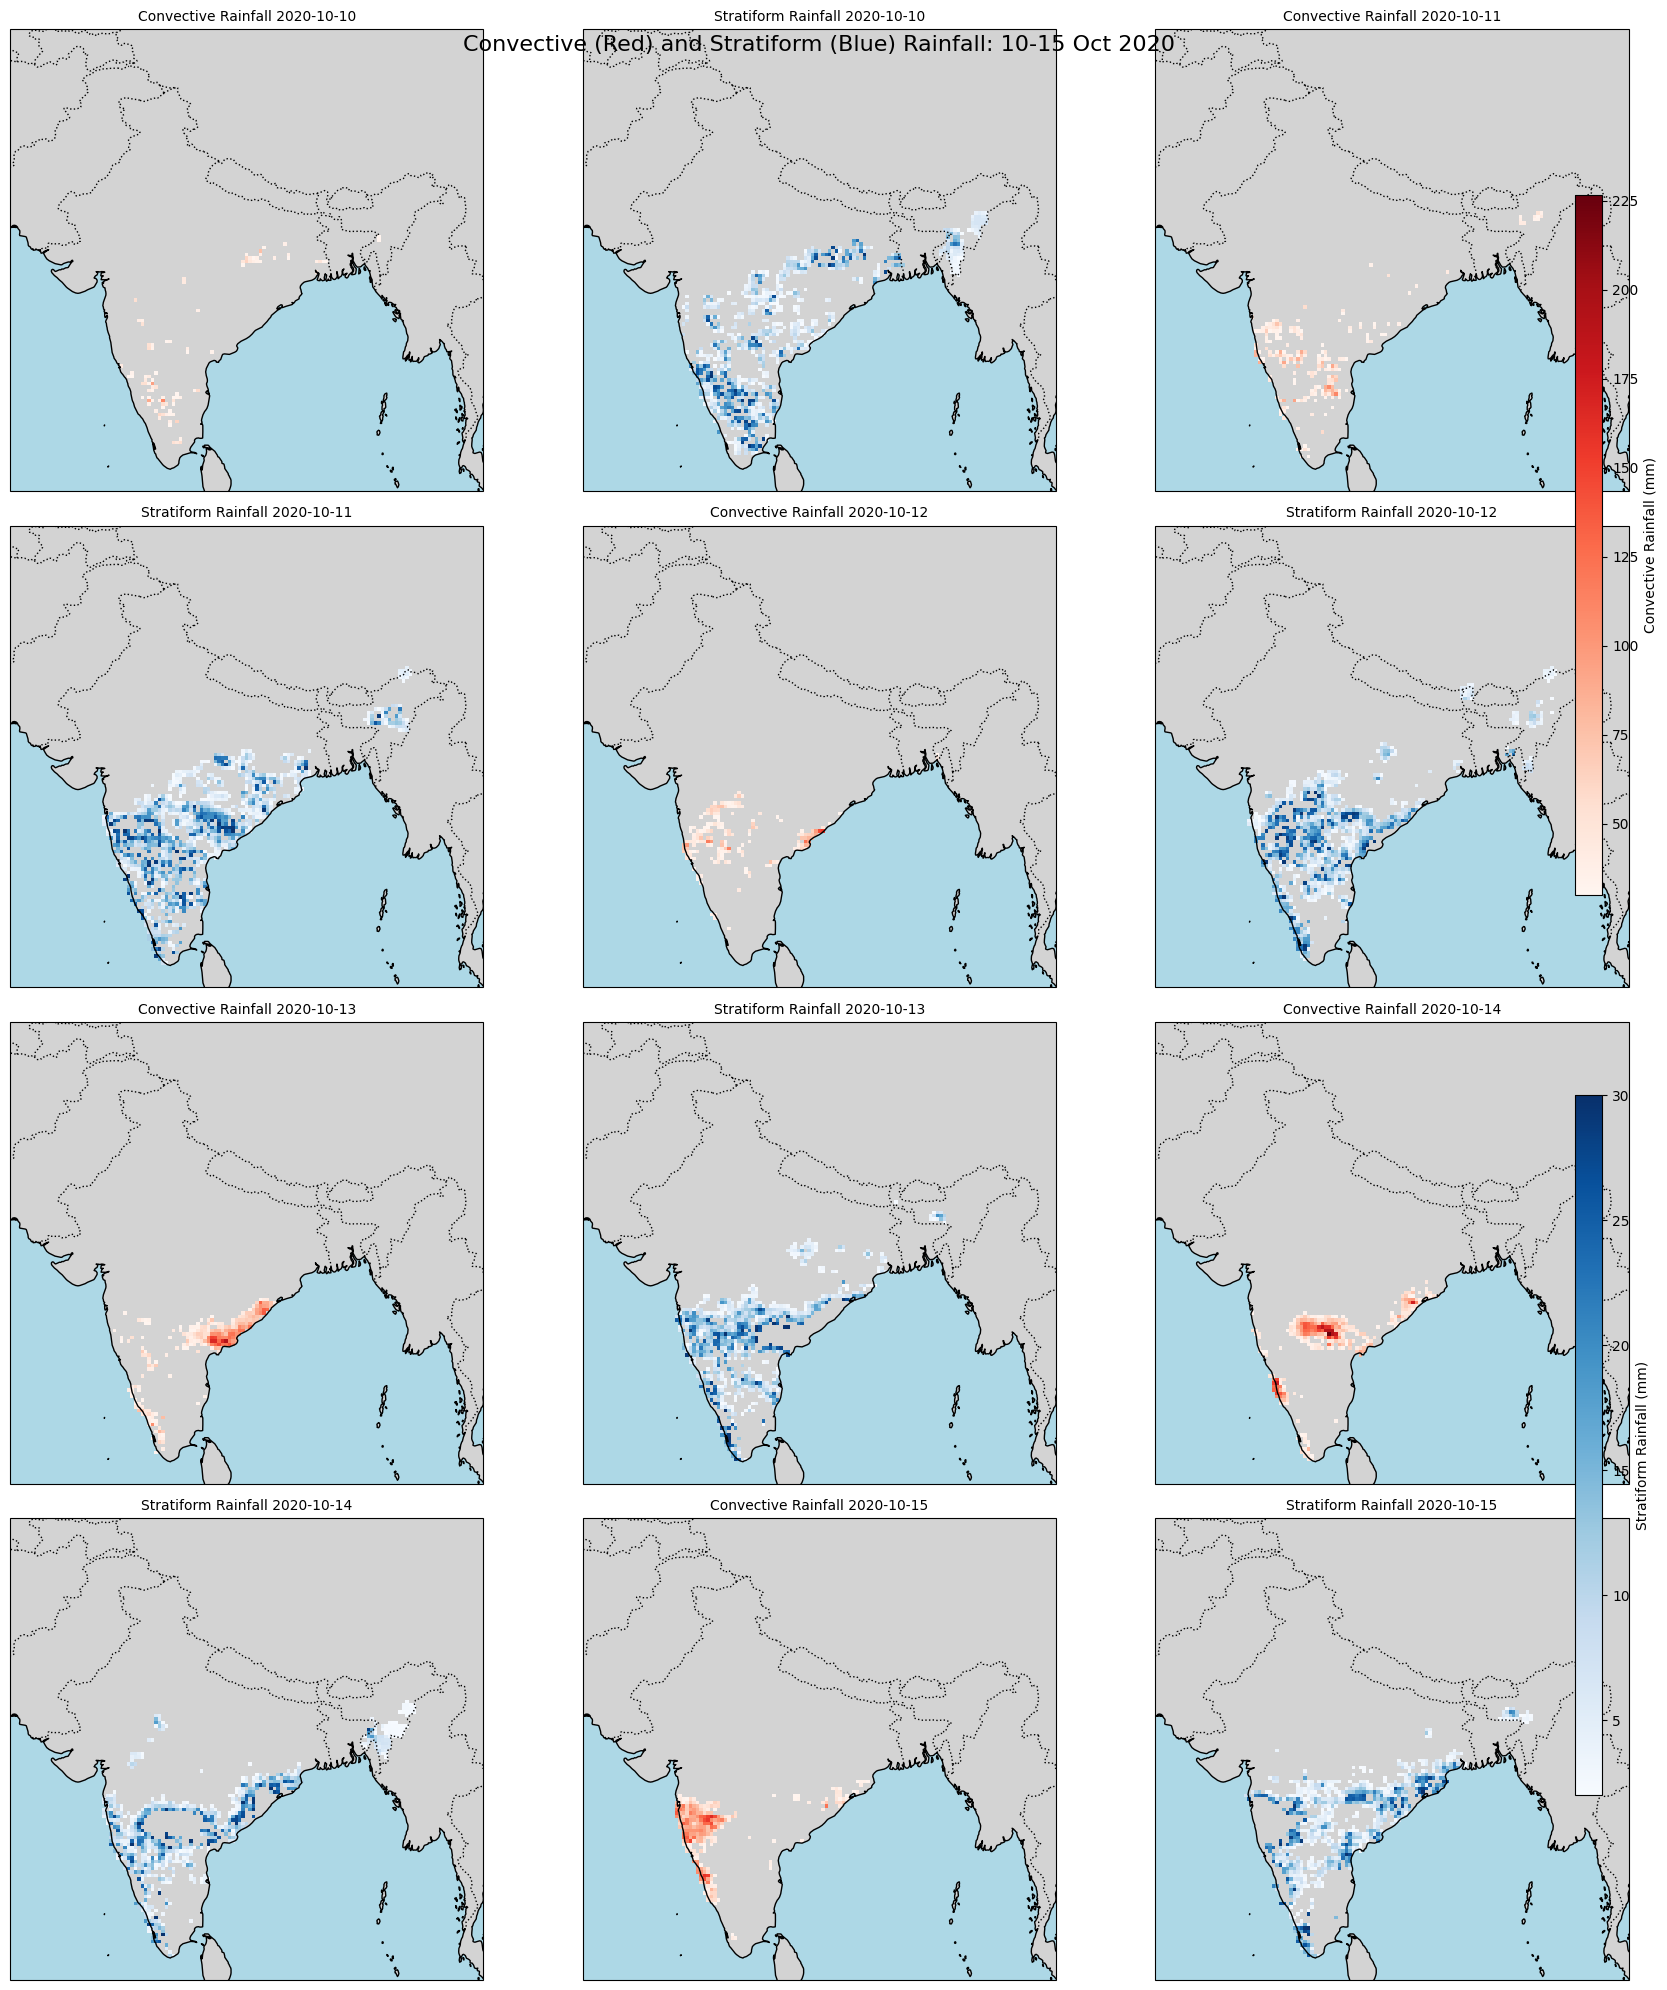

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load the dataset
file_path = 'RF25_ind2020_rfp25.nc'  # Adjust path as needed
ds = xr.open_dataset(file_path)

# Select rainfall variable and dates 10-15 Oct 2020
rain = ds['RAINFALL']  # Adjust variable name if different
rain_sel = rain.sel(TIME=slice('2020-10-10', '2020-10-15'))

# Define thresholds for convective and stratiform rainfall
convective_threshold = 30  # mm/day
stratiform_lower = 2
stratiform_upper = 30

# Apply threshold-based classification
convective = rain_sel.where(rain_sel > convective_threshold)
stratiform = rain_sel.where((rain_sel >= stratiform_lower) & (rain_sel <= stratiform_upper))

# Plotting convective and stratiform rainfall for 10-15 Oct 2020
fig, axes = plt.subplots(4, 3, figsize=(18, 20), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, date in enumerate(rain_sel.TIME.values):
    # Convective rainfall plot
    ax_conv = axes[2*i]
    conv_data = convective.sel(TIME=date)
    mesh_conv = ax_conv.pcolormesh(
        ds['LONGITUDE'], ds['LATITUDE'], conv_data,
        cmap='Reds', shading='auto', vmin=convective_threshold, vmax=np.nanmax(convective),
        transform=ccrs.PlateCarree()
    )
    ax_conv.set_title(f'Convective Rainfall {np.datetime_as_string(date, unit="D")}', fontsize=10)
    ax_conv.set_extent([66, 100, 6.5, 38.5])
    ax_conv.add_feature(cfeature.COASTLINE)
    ax_conv.add_feature(cfeature.BORDERS, linestyle=':')
    ax_conv.add_feature(cfeature.LAND, facecolor='lightgray')
    ax_conv.add_feature(cfeature.OCEAN, facecolor='lightblue')

    # Stratiform rainfall plot
    ax_strat = axes[2*i+1]
    strat_data = stratiform.sel(TIME=date)
    mesh_strat = ax_strat.pcolormesh(
        ds['LONGITUDE'], ds['LATITUDE'], strat_data,
        cmap='Blues', shading='auto', vmin=stratiform_lower, vmax=stratiform_upper,
        transform=ccrs.PlateCarree()
    )
    ax_strat.set_title(f'Stratiform Rainfall {np.datetime_as_string(date, unit="D")}', fontsize=10)
    ax_strat.set_extent([66, 100, 6.5, 38.5])
    ax_strat.add_feature(cfeature.COASTLINE)
    ax_strat.add_feature(cfeature.BORDERS, linestyle=':')
    ax_strat.add_feature(cfeature.LAND, facecolor='lightgray')
    ax_strat.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Adjust layout and add colorbars
plt.tight_layout()
# Colorbars for convective and stratiform
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.015, 0.35])
cbar1 = fig.colorbar(mesh_conv, cax=cbar_ax1)
cbar1.set_label('Convective Rainfall (mm)')
cbar_ax2 = fig.add_axes([0.92, 0.1, 0.015, 0.35])
cbar2 = fig.colorbar(mesh_strat, cax=cbar_ax2)
cbar2.set_label('Stratiform Rainfall (mm)')

plt.suptitle('Convective (Red) and Stratiform (Blue) Rainfall: 10-15 Oct 2020', fontsize=16)
plt.show()


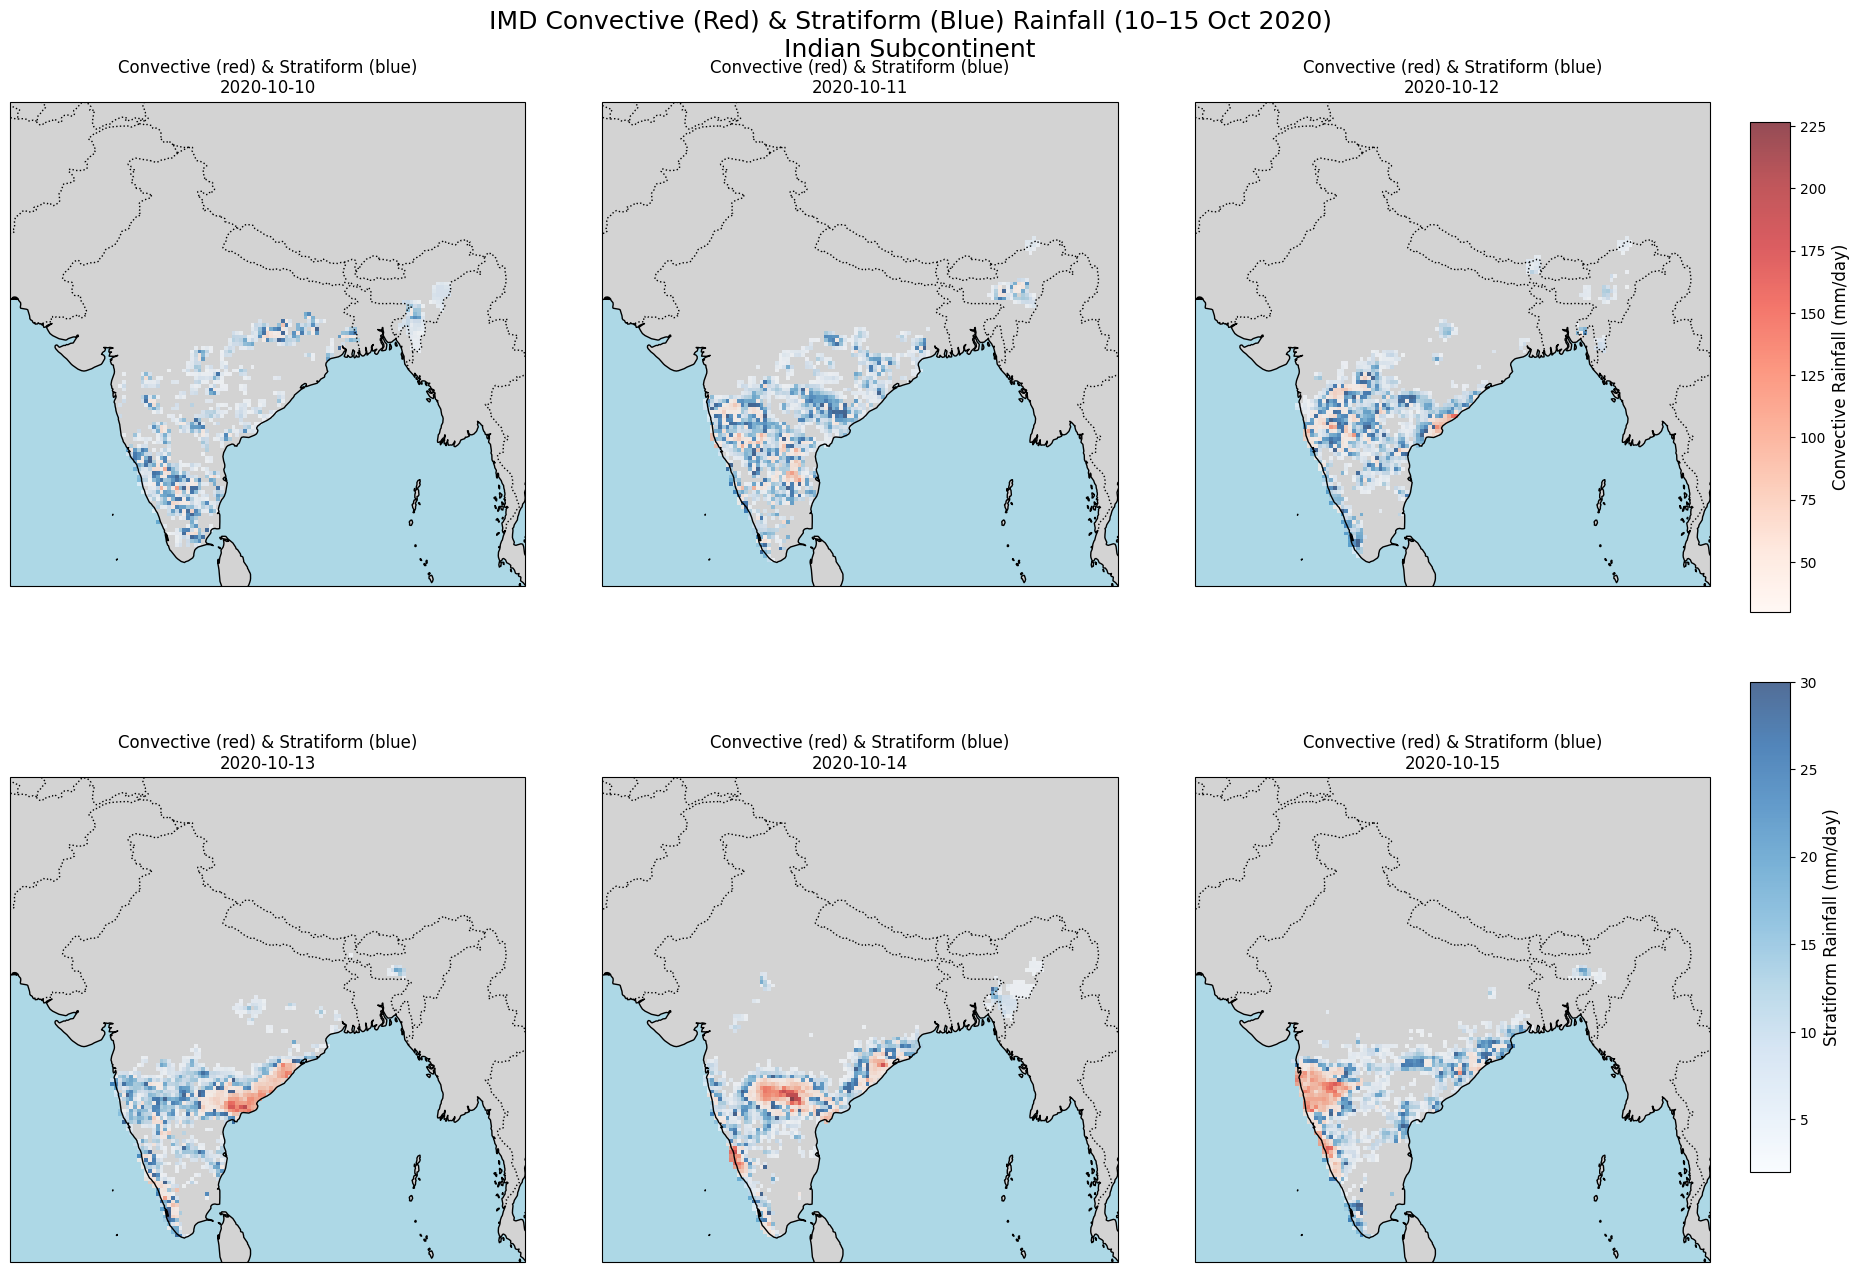

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load dataset
ds = xr.open_dataset('RF25_ind2020_rfp25.nc')
rain = ds['RAINFALL']
rain_sel = rain.sel(TIME=slice('2020-10-10', '2020-10-15'))

# Thresholds
convective_threshold = 30  # mm/day
stratiform_lower = 2
stratiform_upper =30

# Create masks
convective = rain_sel.where(rain_sel > convective_threshold)
stratiform = rain_sel.where((rain_sel >= stratiform_lower) & (rain_sel <= stratiform_upper))

# Plotting parameters
vmax_conv = np.nanmax(convective)
vmax_strat = stratiform_upper

fig, axes = plt.subplots(2, 3, figsize=(20, 14), 
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        constrained_layout=False)  # Disable constrained layout

axes = axes.flatten()

for i, (conv, strat, date) in enumerate(zip(convective, stratiform, rain_sel.TIME.values)):
    ax = axes[i]
    ax.set_extent([66, 100, 6.5, 38.5], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    
    # Plot layers
    mesh_strat = ax.pcolormesh(
        ds['LONGITUDE'], ds['LATITUDE'], strat,
        cmap='Blues', vmin=stratiform_lower, vmax=vmax_strat,
        shading='auto', alpha=0.7, transform=ccrs.PlateCarree()
    )
    mesh_conv = ax.pcolormesh(
        ds['LONGITUDE'], ds['LATITUDE'], conv,
        cmap='Reds', vmin=convective_threshold, vmax=vmax_conv,
        shading='auto', alpha=0.7, transform=ccrs.PlateCarree()
    )
    ax.set_title(f'Convective (red) & Stratiform (blue)\n{np.datetime_as_string(date, unit="D")}', fontsize=12)

# Adjust main plot area
plt.subplots_adjust(
    left=0.05, right=0.90,  # Leave 10% space on right for colorbars
    top=0.92, bottom=0.08,
    hspace=0.35, wspace=0.15
)

# Add colorbars
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.02, 0.35])  # [x, y, width, height]
cbar1 = fig.colorbar(mesh_conv, cax=cbar_ax1)
cbar1.set_label('Convective Rainfall (mm/day)', fontsize=12)

cbar_ax2 = fig.add_axes([0.92, 0.15, 0.02, 0.35])
cbar2 = fig.colorbar(mesh_strat, cax=cbar_ax2)
cbar2.set_label('Stratiform Rainfall (mm/day)', fontsize=12)

# Add title
plt.suptitle('IMD Convective (Red) & Stratiform (Blue) Rainfall (10–15 Oct 2020)\nIndian Subcontinent', 
            fontsize=18, y=0.98)

plt.show()


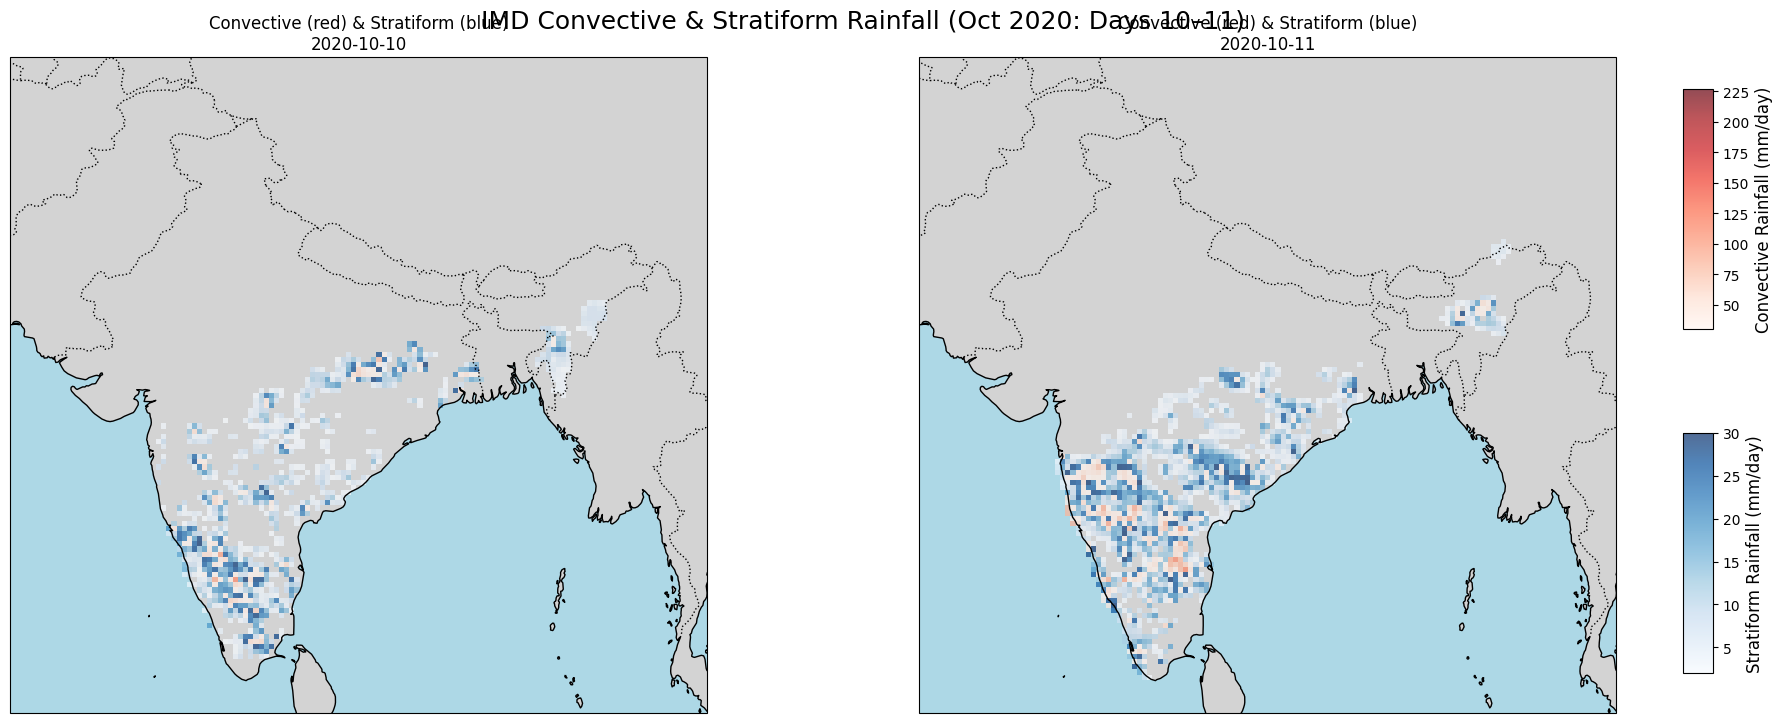

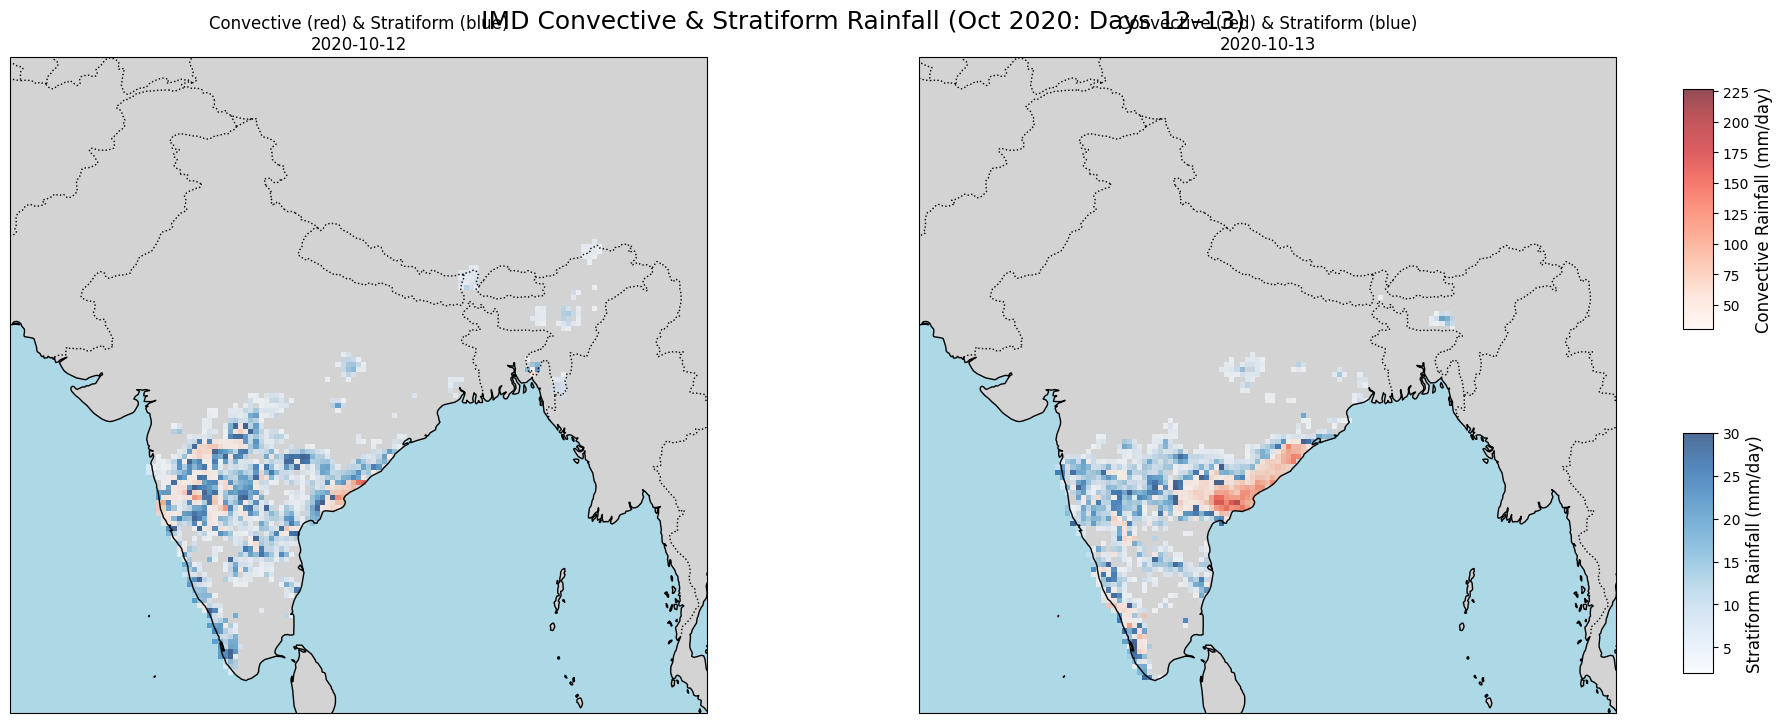

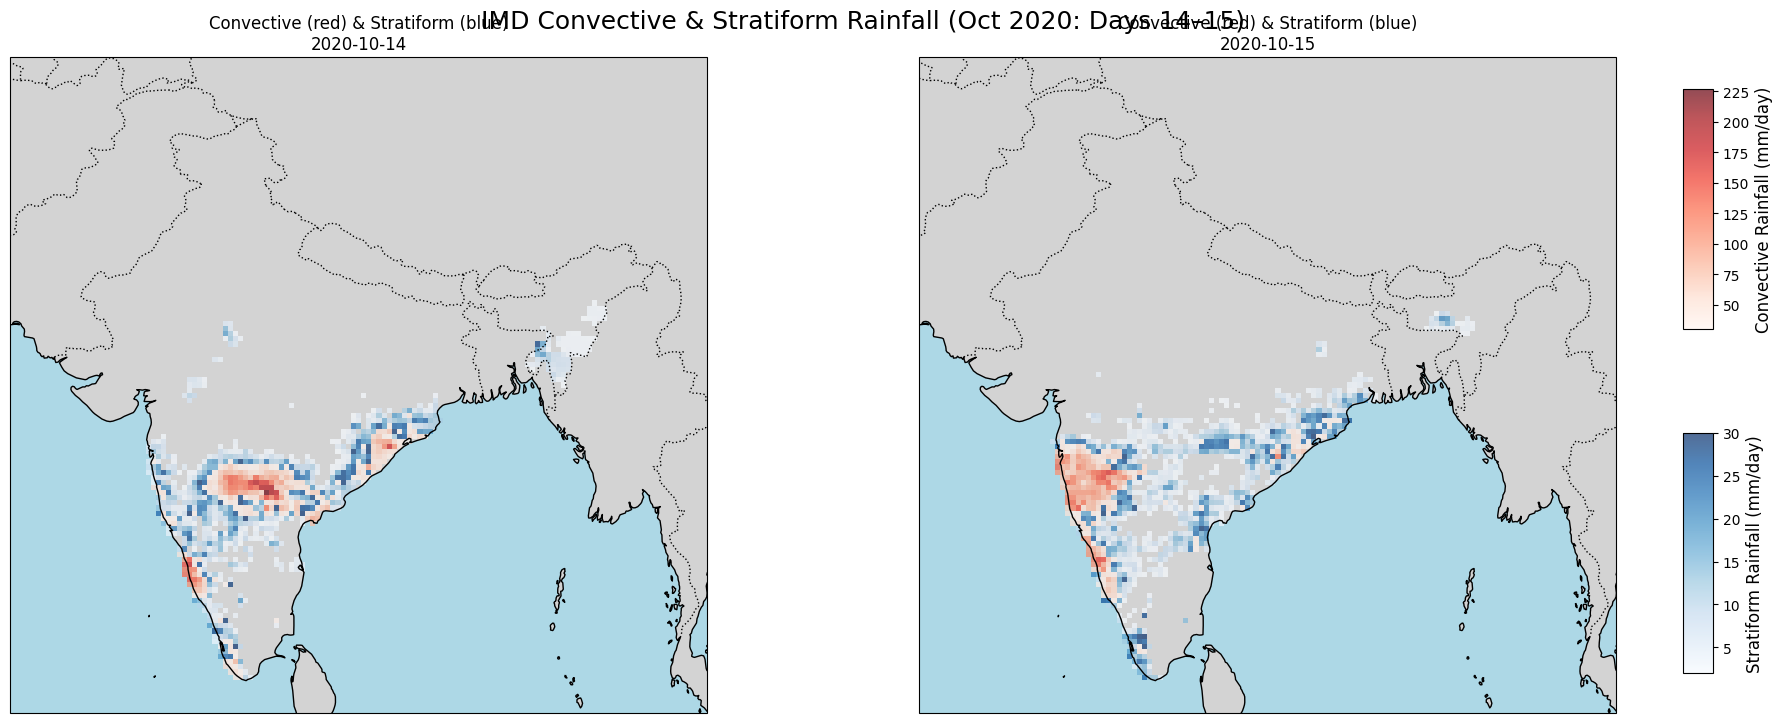

In [17]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load dataset
ds = xr.open_dataset('RF25_ind2020_rfp25.nc')
rain = ds['RAINFALL']
rain_sel = rain.sel(TIME=slice('2020-10-10', '2020-10-15'))

# Thresholds
convective_threshold = 30  # mm/day
stratiform_lower = 2
stratiform_upper = 30

# Create masks
convective = rain_sel.where(rain_sel > convective_threshold)
stratiform = rain_sel.where((rain_sel >= stratiform_lower) & (rain_sel <= stratiform_upper))

# Determine max for colorbar scaling
vmax_conv = np.nanmax(convective)
vmax_strat = stratiform_upper

# Split into 3 figures, 2 maps per figure
for fig_num in range(3):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8),
                             subplot_kw={'projection': ccrs.PlateCarree()},
                             constrained_layout=False)

    for i in range(2):
        index = fig_num * 2 + i
        if index >= len(rain_sel.TIME):
            break

        ax = axes[i]
        ax.set_extent([66, 100, 6.5, 38.5], crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.LAND, facecolor='lightgray')
        ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

        # Plot stratiform
        strat = stratiform[index]
        conv = convective[index]
        date = rain_sel.TIME.values[index]

        mesh_strat = ax.pcolormesh(
            ds['LONGITUDE'], ds['LATITUDE'], strat,
            cmap='Blues', vmin=stratiform_lower, vmax=vmax_strat,
            shading='auto', alpha=0.7, transform=ccrs.PlateCarree()
        )
        mesh_conv = ax.pcolormesh(
            ds['LONGITUDE'], ds['LATITUDE'], conv,
            cmap='Reds', vmin=convective_threshold, vmax=vmax_conv,
            shading='auto', alpha=0.7, transform=ccrs.PlateCarree()
        )

        ax.set_title(f'Convective (red) & Stratiform (blue)\n{np.datetime_as_string(date, unit="D")}', fontsize=12)

    # Colorbars
    plt.subplots_adjust(left=0.05, right=0.90, top=0.92, bottom=0.10, wspace=0.15)
    cbar_ax1 = fig.add_axes([0.91, 0.58, 0.015, 0.30])
    cbar1 = fig.colorbar(mesh_conv, cax=cbar_ax1)
    cbar1.set_label('Convective Rainfall (mm/day)', fontsize=12)

    cbar_ax2 = fig.add_axes([0.91, 0.15, 0.015, 0.30])
    cbar2 = fig.colorbar(mesh_strat, cax=cbar_ax2)
    cbar2.set_label('Stratiform Rainfall (mm/day)', fontsize=12)

    # Title for each figure
    plt.suptitle(f'IMD Convective & Stratiform Rainfall (Oct 2020: Days {fig_num*2 + 10}–{fig_num*2 + 11})',
                 fontsize=18, y=0.98)

    plt.show()


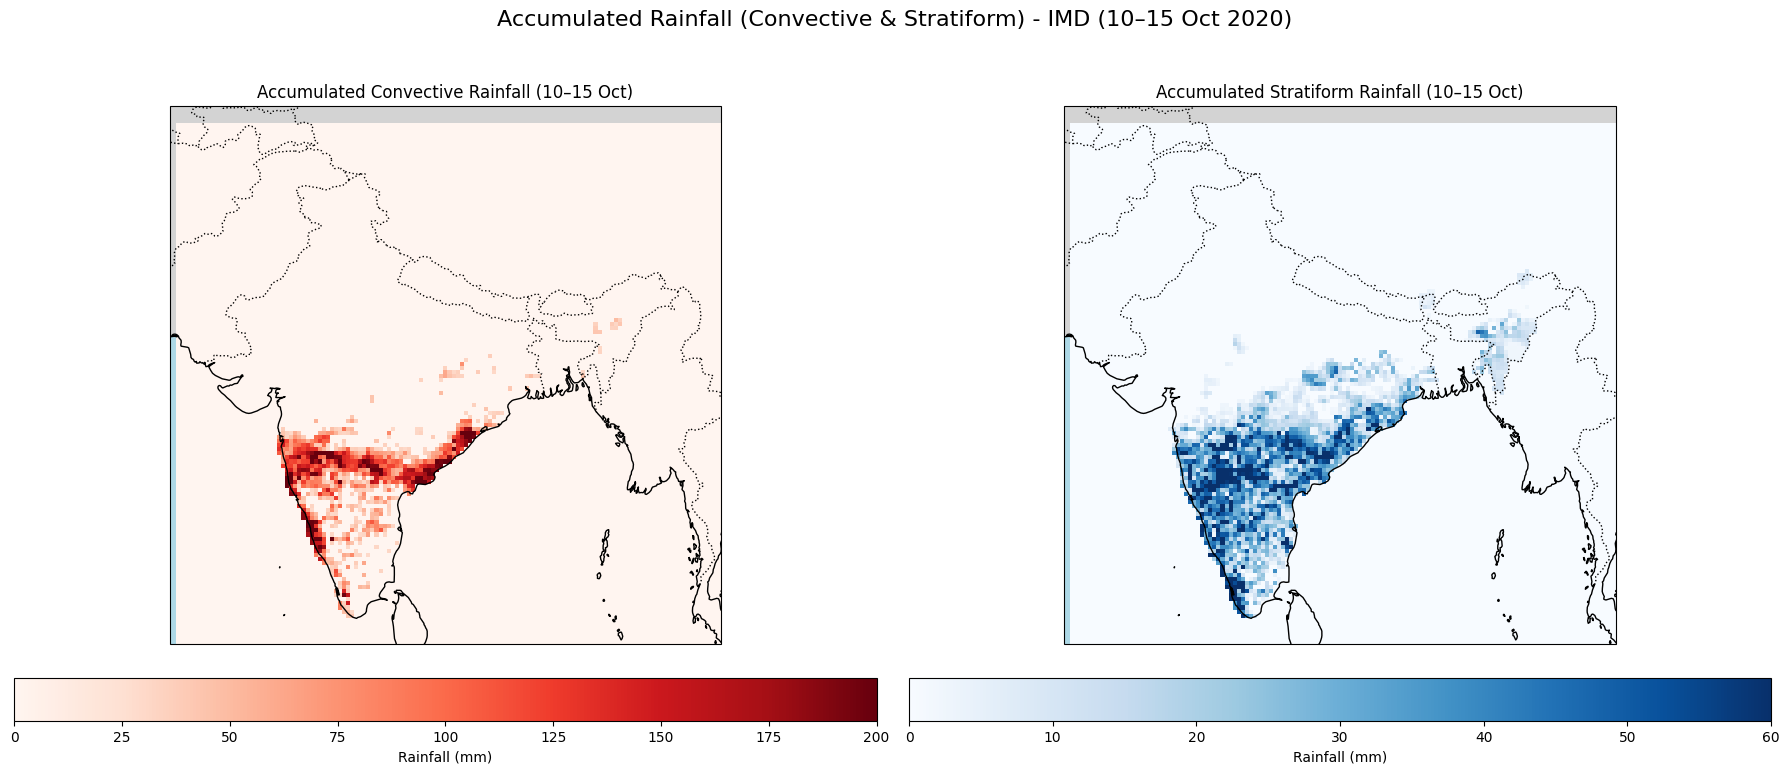

In [18]:
# Accumulated rainfall
conv_total = convective.sum(dim='TIME')
strat_total = stratiform.sum(dim='TIME')

fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Convective
axes[0].set_extent([66, 100, 6.5, 38.5])
axes[0].add_feature(cfeature.COASTLINE)
axes[0].add_feature(cfeature.BORDERS, linestyle=':')
axes[0].add_feature(cfeature.LAND, facecolor='lightgray')
axes[0].add_feature(cfeature.OCEAN, facecolor='lightblue')
c1 = axes[0].pcolormesh(ds['LONGITUDE'], ds['LATITUDE'], conv_total, cmap='Reds', vmin=0, vmax=200)
axes[0].set_title('Accumulated Convective Rainfall (10–15 Oct)')

# Stratiform
axes[1].set_extent([66, 100, 6.5, 38.5])
axes[1].add_feature(cfeature.COASTLINE)
axes[1].add_feature(cfeature.BORDERS, linestyle=':')
axes[1].add_feature(cfeature.LAND, facecolor='lightgray')
axes[1].add_feature(cfeature.OCEAN, facecolor='lightblue')
c2 = axes[1].pcolormesh(ds['LONGITUDE'], ds['LATITUDE'], strat_total, cmap='Blues', vmin=0, vmax=60)
axes[1].set_title('Accumulated Stratiform Rainfall (10–15 Oct)')

# Colorbars
fig.colorbar(c1, ax=axes[0], orientation='horizontal', pad=0.05, label='Rainfall (mm)')
fig.colorbar(c2, ax=axes[1], orientation='horizontal', pad=0.05, label='Rainfall (mm)')

plt.suptitle('Accumulated Rainfall (Convective & Stratiform) - IMD (10–15 Oct 2020)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


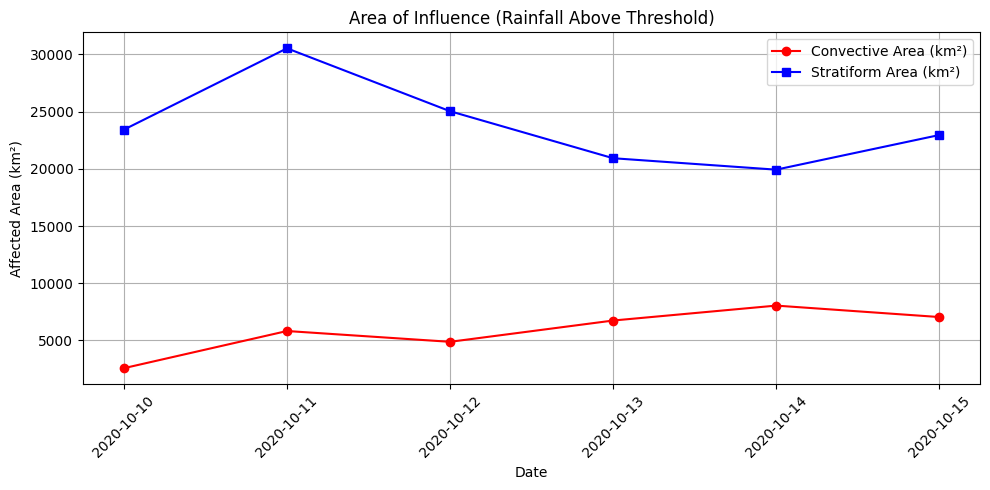

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Approximate area per grid cell (0.25° × 0.25°): ~27.75 km² (at equator)
cell_area_km2 = 27.75

# Count non-NaN grid cells (i.e., those above threshold)
conv_area_km2 = [np.count_nonzero(~np.isnan(day.values)) * cell_area_km2 for day in convective]
strat_area_km2 = [np.count_nonzero(~np.isnan(day.values)) * cell_area_km2 for day in stratiform]

# Plot area of influence
days = rain_sel.TIME.values

plt.figure(figsize=(10, 5))
plt.plot(days, conv_area_km2, label='Convective Area (km²)', marker='o', color='red')
plt.plot(days, strat_area_km2, label='Stratiform Area (km²)', marker='s', color='blue')
plt.title('Area of Influence (Rainfall Above Threshold)')
plt.xlabel('Date')
plt.ylabel('Affected Area (km²)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


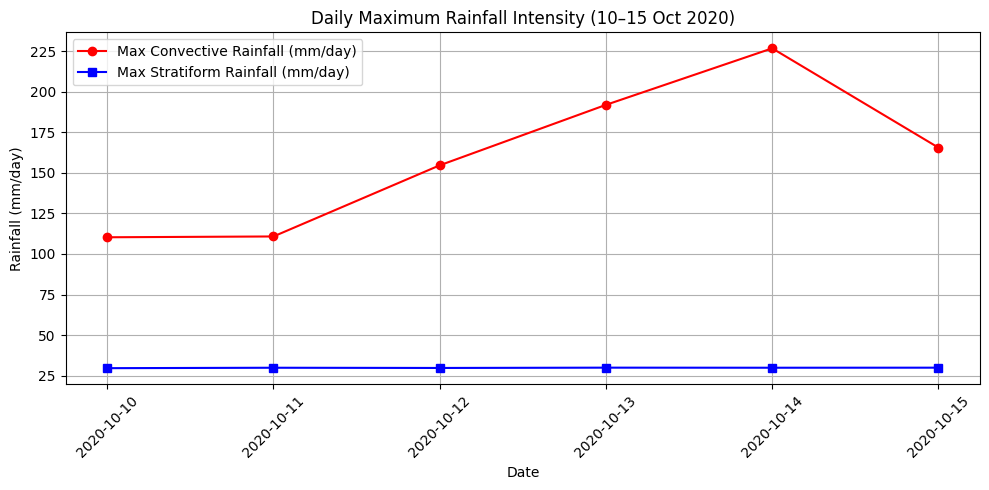

In [20]:
# Maximum intensity per day
conv_max = [np.nanmax(conv.values) for conv in convective]
strat_max = [np.nanmax(strat.values) for strat in stratiform]

plt.figure(figsize=(10, 5))
plt.plot(days, conv_max, label='Max Convective Rainfall (mm/day)', marker='o', color='red')
plt.plot(days, strat_max, label='Max Stratiform Rainfall (mm/day)', marker='s', color='blue')
plt.title('Daily Maximum Rainfall Intensity (10–15 Oct 2020)')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm/day)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# Example: Replace with your actual MD dates
md_dates = {
    2014: ['04-01-2014', '05-01-2014', '06-01-2014', '07-01-2014', '21-05-2014', '22-05-2014', '23-05-2014', '21-07-2014', '22-07-2014', '23-07-2014', '03-08-2014', '04-08-2014', '05-08-2014', '06-08-2014', '07-08-2014', '05-11-2014', '06-11-2014', '07-11-2014', '08-11-2014'],
    2015: ['20-06-2015', '21-06-2015', '22-06-2015', '23-06-2015', '24-06-2015', '25-06-2015', '10-07-2015', '11-07-2015', '12-07-2015', '27-07-2015', '28-07-2015', '29-07-2015','30-07-2015', '04-08-2015', '05-08-2015', '16-09-2015', '17-09-2015', '18-09-2015', '19-09-2015', '09-10-2015', '10-10-2015', '11-10-2015', '12-10-2015', '08-11-2015', '09-11-2015', '10-11-2015'],
    2016: ['27-06-2016', '28-06-2016', '29-06-2016', '06-07-2016', '06-07-2016', '09-08-2016', '10-08-2016', '11-08-2016', '12-08-2016', '13-08-2016', '16-08-2016', '17-08-2016', '18-08-2016', '19-08-2016', '20-08-2016', '21-08-2016', '02-11-2016', '03-11-2016', '04-11-2016', '05-11-2016', '06-11-2016', '17-12-2016', '18-12-2016'],
    2017: ['11-06-2017', '12-06-2017', '13-06-2017', '18-07-2017', '19-07-2017', '26-07-2017', '27-07-2017', '10-09-2017', '19-10-2017', '20-10-2017', '21-10-2017', '15-11-2017', '16-11-2017', '17-11-2017', '06-12-2017', '07-12-2017', '08-12-2017', '09-12-2017'],
    2018: ['13-03-2018', '14-03-2018', '15-03-2018', '29-05-2018', '30-05-2018', '10-06-2018', '11-06-2018', '21-07-2018', '22-07-2018', '23-07-2018', '07-08-2018', '08-08-2018', '15-08-2018', '16-08-2018', '17-08-2018', '06-09-2018', '07-09-2018', '08-09-2018'],
    2019: ['06-08-2019', '07-08-2019', '08-08-2019', '09-08-2019', '29-09-2019', '30-09-2019', '01-10-2019', '03-12-2019', '04-12-2019', '05-12-2019', '08-12-2019', '09-12-2019', '10-12-2019'],
    2020: ['29-05-2020', '30-05-2020', '31-05-2020', '01-06-2020','11-10-2020', '12-10-2020', '13-10-2020','14-10-2020', '17-10-2020', '18-10-2020', '19-10-2020', '22-10-2020', '23-10-2020', '24-10-2020']
}


In [22]:
import xarray as xr
import numpy as np
import os
from datetime import datetime

# --- 1. MD Dates Dictionary (YYYY-MM-DD format) ---
md_dates = {
    2014: ['2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-05-21', '2014-05-22', '2014-05-23', 
           '2014-07-21', '2014-07-22', '2014-07-23', '2014-08-03', '2014-08-04', '2014-08-05', '2014-08-06', 
           '2014-08-07', '2014-11-05', '2014-11-06', '2014-11-07', '2014-11-08'],
    2015: ['2015-06-20', '2015-06-21', '2015-06-22', '2015-06-23', '2015-06-24', '2015-06-25', '2015-07-10',
           '2015-07-11', '2015-07-12', '2015-07-27', '2015-07-28', '2015-07-29','2015-07-30', '2015-08-04', 
           '2015-08-05', '2015-09-16', '2015-09-17', '2015-09-18', '2015-09-19', '2015-10-09', '2015-10-10', 
           '2015-10-11', '2015-10-12', '2015-11-08', '2015-11-09', '2015-11-10'],
    2016: ['2016-06-27', '2016-06-28', '2016-06-29', '2016-07-06', '2016-07-06', '2016-08-09', '2016-08-10', 
           '2016-08-11', '2016-08-12', '2016-08-13', '2016-08-16', '2016-08-17', '2016-08-18', '2016-08-19', 
           '2016-08-20', '2016-08-21', '2016-11-02', '2016-11-03', '2016-11-04', '2016-11-05', '2016-11-06', 
           '2016-12-17', '2016-12-18'],
    2017: ['2017-06-11', '2017-06-12', '2017-06-13', '2017-07-18', '2017-07-19', '2017-07-26', '2017-07-27', 
           '2017-09-10', '2017-10-19', '2017-10-20', '2017-10-21', '2017-11-15', '2017-11-16', '2017-11-17', 
           '2017-12-06', '2017-12-07', '2017-12-08', '2017-12-09'],
    2018: ['2018-03-13', '2018-03-14', '2018-03-15', '2018-05-29', '2018-05-30', '2018-06-10', '2018-06-11', 
           '2018-07-21', '2018-07-22', '2018-07-23', '2018-08-07', '2018-08-08', '2018-08-15', '2018-08-16', 
           '2018-08-17', '2018-09-06', '2018-09-07', '2018-09-08'],
    2019: ['2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09', '2019-09-29', '2019-09-30', '2019-10-01', 
           '2019-12-03', '2019-12-04', '2019-12-05', '2019-12-08', '2019-12-09', '2019-12-10'],
    2020: ['2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01','2020-10-11', '2020-10-12', '2020-10-13',
           '2020-10-14', '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-22', '2020-10-23', '2020-10-24']
}

# --- 2. File Paths ---
merge_file_path = [
    'merge_2014.nc', 'merge_2015.nc', 'merge_2016.nc',
    'merge_2017.nc', 'merge_2018.nc', 'merge_2019.nc'
]

folder_path_2020 = 'GPM_3IMERGDF_07-20250607_144323'  # Change this if needed

# --- 3. Composite for 2014–2019 ---
try:
    ds_merge = xr.open_mfdataset(merge_file_path, combine='by_coords')
    print('Merged dataset loaded successfully.')

    # Remove duplicate time entries
    _, index = np.unique(ds_merge['time'], return_index=True)
    ds_merge = ds_merge.isel(time=index)

    # Prepare and filter MD dates
    md_dates_merged = []
    for year in range(2014, 2020):
        md_dates_merged.extend(md_dates.get(year, []))

    md_dates_merged_dt = [np.datetime64(datetime.strptime(d, '%Y-%m-%d')) for d in md_dates_merged]
    available_times = ds_merge.time.values.astype('datetime64[D]')
    md_dates_present = [d for d in md_dates_merged_dt if d in available_times]
    missing_dates = [d for d in md_dates_merged_dt if d not in available_times]
    print("Missing dates:", missing_dates)

    # Composite calculation
    composite_merged = ds_merge['precipitationCal'].sel(time=md_dates_present).mean(dim='time')

except FileNotFoundError:
    composite_merged = None
    print(f'Merged file not found: {merge_file_path}')

# --- 4. Composite for 2020 ---
composite_list_2020 = []
missing_files = []

for date_str in md_dates[2020]:
    date_nc = date_str.replace('-', '')
    file_name = f'3B-DAY.MS.MRG.3IMERG.{date_nc}-S000000-E235959.V07B.nc4'
    file_path = os.path.join(folder_path_2020, file_name)
    if os.path.exists(file_path):
        ds_day = xr.open_dataset(file_path)
        precip = ds_day['precipitation'].sel(lat=slice(5, 37), lon=slice(66, 98))
        composite_list_2020.append(precip)
    else:
        missing_files.append(file_path)

if composite_list_2020:
    composite_2020 = xr.concat(composite_list_2020, dim='time').mean(dim='time')
else:
    composite_2020 = None

# --- 5. Output Summary ---
if missing_files:
    print(f"Missing files for 2020 MD dates: {missing_files}")
if composite_merged is not None:
    print("Composite for 2014–2019 created.")
if composite_2020 is not None:
    print("Composite for 2020 created.")

summary = {
    'composite_merged_exists': composite_merged is not None,
    'composite_2020_exists': composite_2020 is not None,
    'missing_files_2020_count': len(missing_files)
}
print(summary)


Merged dataset loaded successfully.
Missing dates: [numpy.datetime64('2014-04-01T00:00:00.000000'), numpy.datetime64('2014-05-01T00:00:00.000000'), numpy.datetime64('2014-05-21T00:00:00.000000'), numpy.datetime64('2014-05-22T00:00:00.000000'), numpy.datetime64('2014-05-23T00:00:00.000000'), numpy.datetime64('2014-07-21T00:00:00.000000'), numpy.datetime64('2014-11-05T00:00:00.000000'), numpy.datetime64('2014-11-06T00:00:00.000000'), numpy.datetime64('2014-11-07T00:00:00.000000'), numpy.datetime64('2014-11-08T00:00:00.000000'), numpy.datetime64('2015-06-25T00:00:00.000000'), numpy.datetime64('2015-07-12T00:00:00.000000'), numpy.datetime64('2015-07-30T00:00:00.000000'), numpy.datetime64('2015-10-09T00:00:00.000000'), numpy.datetime64('2015-10-10T00:00:00.000000'), numpy.datetime64('2015-10-11T00:00:00.000000'), numpy.datetime64('2015-10-12T00:00:00.000000'), numpy.datetime64('2015-11-08T00:00:00.000000'), numpy.datetime64('2015-11-09T00:00:00.000000'), numpy.datetime64('2015-11-10T00:00:0

In [23]:
import xarray as xr

# Open the file
ds = xr.open_dataset('merge_2014.nc')

# Display a summary
print(ds)


<xarray.Dataset> Size: 334MB
Dimensions:                    (lon: 401, lat: 351, time: 108, bnds: 2)
Coordinates:
  * lon                        (lon) float32 2kB 60.05 60.15 ... 99.95 100.1
  * lat                        (lat) float32 1kB 4.95 5.05 5.15 ... 39.85 39.95
  * time                       (time) datetime64[ns] 864B 2014-06-01 ... 2014...
Dimensions without coordinates: bnds
Data variables:
    time_bnds                  (time, bnds) datetime64[ns] 2kB ...
    precipitationCal           (time, lon, lat) float32 61MB ...
    HQprecipitation            (time, lon, lat) float32 61MB ...
    precipitationCal_cnt       (time, lon, lat) int16 30MB ...
    randomError                (time, lon, lat) float32 61MB ...
    randomError_cnt            (time, lon, lat) int16 30MB ...
    precipitationCal_cnt_cond  (time, lon, lat) int16 30MB ...
    HQprecipitation_cnt        (time, lon, lat) int16 30MB ...
    HQprecipitation_cnt_cond   (time, lon, lat) int16 30MB ...
Attributes: (12/13

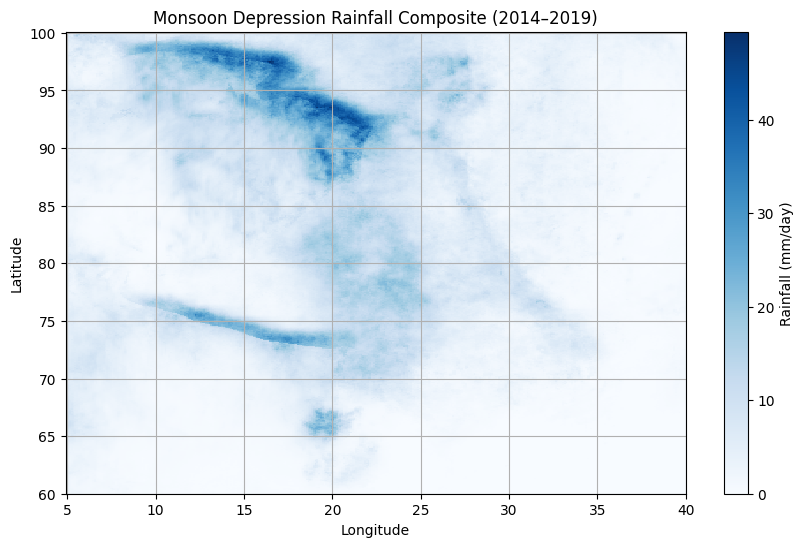

AttributeError: 'NoneType' object has no attribute 'plot'

<Figure size 1000x600 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

def plot_composite(data, title):
    plt.figure(figsize=(10, 6))
    data.plot(cmap='Blues', cbar_kwargs={'label': 'Rainfall (mm/day)'})
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

plot_composite(composite_merged, 'Monsoon Depression Rainfall Composite (2014–2019)')
plot_composite(composite_2020, 'Monsoon Depression Rainfall Composite (2020)')


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_composite_cartopy(data, title, vmin=0, vmax=50):
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature

    # Transpose to (lat, lon) if necessary
    if list(data.dims) == ['lon', 'lat']:
        data = data.transpose('lat', 'lon')

    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())

    im = data.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap='Blues',
        vmin=vmin,
        vmax=vmax,
        cbar_kwargs={'label': 'Rainfall (mm/day)'}
    )

    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='gray')
    ax.set_title(title, fontsize=14)

    plt.tight_layout()
    plt.show()



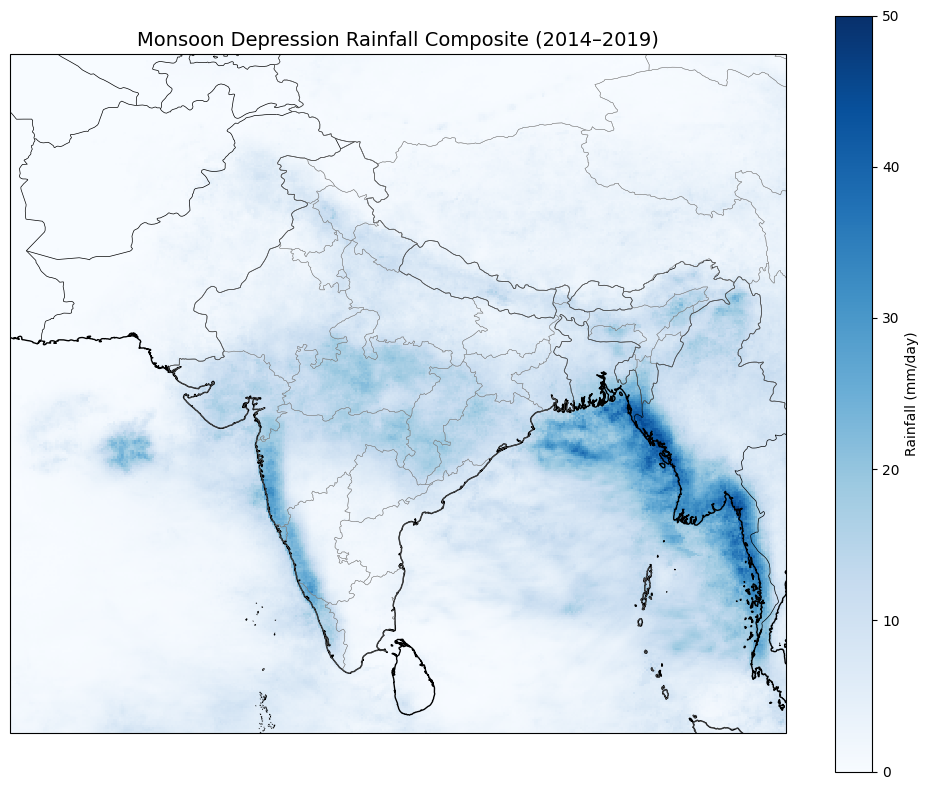

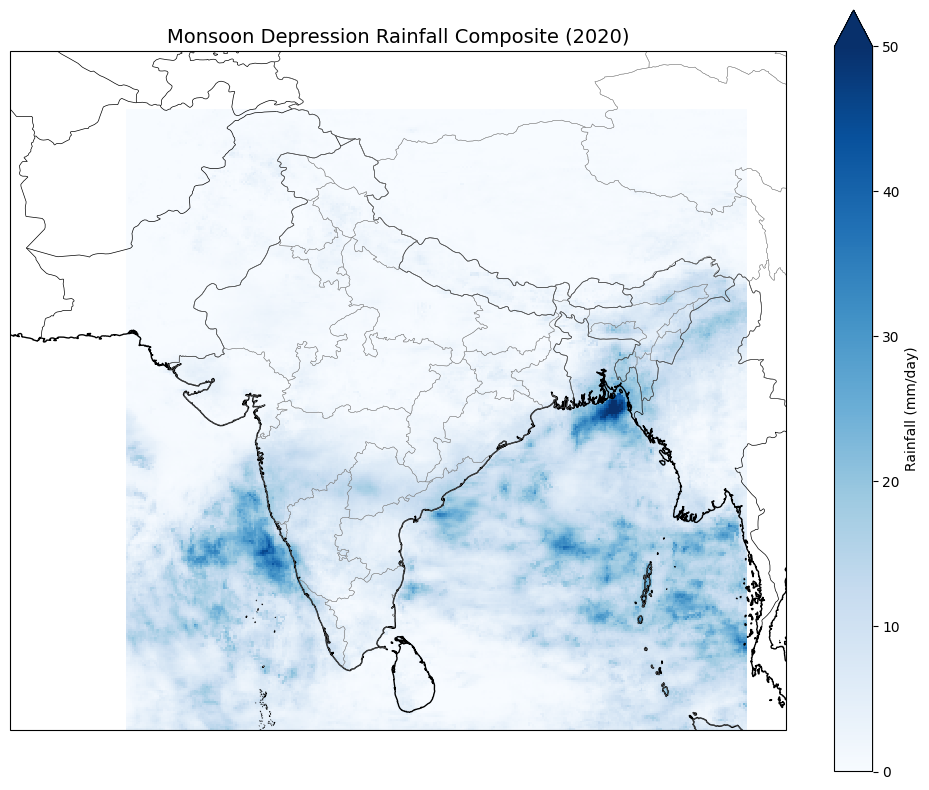

In [ ]:
plot_composite_cartopy(composite_merged, 'Monsoon Depression Rainfall Composite (2014–2019)')
plot_composite_cartopy(composite_2020, 'Monsoon Depression Rainfall Composite (2020)')


In [ ]:
print("Shape:", composite_merged.shape)
print("Coords:", composite_merged.coords)
print("Min:", composite_merged.min().values)
print("Max:", composite_merged.max().values)
print("Contains NaNs:", composite_merged.isnull().any().values)
print("Data type:", type(composite_merged))


Shape: (401, 351)
Coords: Coordinates:
  * lon      (lon) float32 2kB 60.05 60.15 60.25 60.35 ... 99.85 99.95 100.1
  * lat      (lat) float32 1kB 4.95 5.05 5.15 5.25 ... 39.65 39.75 39.85 39.95
Min: 0.0
Max: 49.43953
Contains NaNs: False
Data type: <class 'xarray.core.dataarray.DataArray'>


In [ ]:
total = np.prod(data.shape)
n_nan = np.isnan(data.values).sum()
print(f"{n_nan} NaNs out of {total} values ({(n_nan/total)*100:.2f}%)")


12451 NaNs out of 17415 values (71.50%)


In [ ]:
import xarray as xr
import numpy as np
import os
from datetime import datetime

yearly_composites = {}

for year in range(2014, 2020):
    file_path = f'merge_{year}.nc'
    if os.path.exists(file_path):
        ds = xr.open_dataset(file_path)
        # Remove duplicate time entries to avoid InvalidIndexError
        ds = ds.groupby('time').first()
        md_dates_year = [np.datetime64(datetime.strptime(d, '%Y-%m-%d')) for d in md_dates[year]]
        available_times = ds.time.values.astype('datetime64[D]')
        md_dates_present = [d for d in md_dates_year if d in available_times]
        if md_dates_present:
            composite = ds['precipitationCal'].sel(time=md_dates_present).mean(dim='time')
            yearly_composites[year] = composite
            print(f"Composite for {year} created.")
        else:
            print(f"No MD dates found for {year} in file.")
    else:
        print(f"File not found: {file_path}")

# Output the keys to confirm which years were created
print("Yearly composites created for years:", list(yearly_composites.keys()))


Composite for 2014 created.
Composite for 2015 created.
Composite for 2016 created.
Composite for 2017 created.
Composite for 2018 created.
Composite for 2019 created.
Yearly composites created for years: [2014, 2015, 2016, 2017, 2018, 2019]


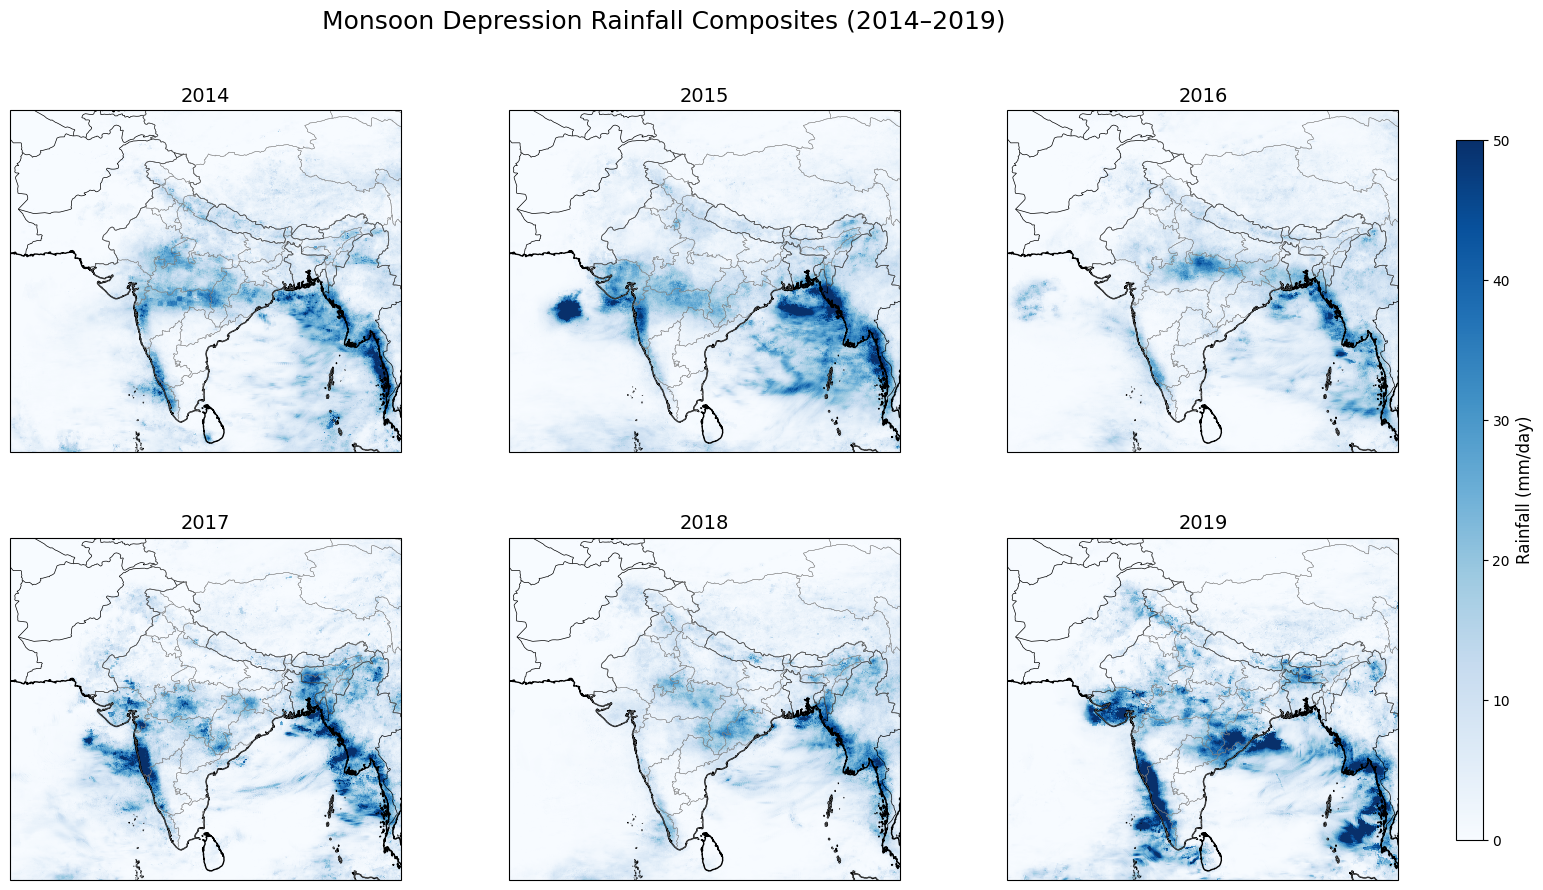

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_yearly_composites_grid(yearly_composites, vmin=0, vmax=50):
    years = sorted(yearly_composites.keys())
    n_years = len(years)
    ncols = 3
    nrows = (n_years + ncols - 1) // ncols

    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows),
        subplot_kw={'projection': ccrs.PlateCarree()}
    )
    axes = axes.flatten()

    # Plot all years
    for i, year in enumerate(years):
        data = yearly_composites[year]
        if list(data.dims) == ['lon', 'lat']:
            data = data.transpose('lat', 'lon')
        ax = axes[i]
        mesh = data.plot(
            ax=ax,
            transform=ccrs.PlateCarree(),
            cmap='Blues',
            vmin=vmin,
            vmax=vmax,
            add_colorbar=False
        )
        ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())
        ax.coastlines(resolution='10m')
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='gray')
        ax.set_title(f'{year}', fontsize=14)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout to make space for colorbar
    plt.subplots_adjust(right=0.92, wspace=0.15, hspace=0.25)
    # Add colorbar in a new axes on the right
    cbar_ax = fig.add_axes([0.94, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(mesh, cax=cbar_ax)
    cbar.set_label('Rainfall (mm/day)', fontsize=12)

    plt.suptitle('Monsoon Depression Rainfall Composites (2014–2019)', fontsize=18, y=0.98)
    plt.show()

# Call the function
plot_yearly_composites_grid(yearly_composites)
